### Project Overview
- You are assigned to retrieve 5 years of data on secirities belinging to the S&P500, Nasdaq, and Russell
- You will Use the ADJ Close and Volume(daily change)  of these companie to try to predict the value of the UVXY 
- Use feature engineering to  try to generate more features for the data set, how do these features coorelate to UVXY
- Does these valuse have any predictive abilities on UVXY?
- Keep in mind you will be working with alot of companies and features so consider a method to reduce these features, may be attempt a PCA and see how the results will pan out

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

## importing Tickers 
- WE will import all tickers from Nasdaq, S&P, and Russell as of 2020

In [2]:
sandp = pd.read_csv("resources/companies.csv")

In [3]:
len(sandp["Symbol"])

505

In [4]:
russell = pd.read_excel("resources/Russle_2000_2020.xlsx")

In [5]:
russell_tickers = list(russell["Ticker"])

In [6]:
len(russell_tickers)

1999

In [7]:
russell_zip = dict(zip(russell["Ticker"], russell["Name"]))

In [8]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [9]:
nasdaq_tickers = nasdaq["Ticker"]

In [10]:
len(nasdaq_tickers)

103

In [11]:
nasdaq_zipp = dict(zip(nasdaq["Ticker"], nasdaq["Name"]))

## Zipping
- We will zip the ticker and the company's name together if we need to query the company's name at some point

In [12]:
sandpZip = dict(zip(sandp["Symbol"], sandp["Name"]))

## Getting Stock Data for Each ticker 
- We will begin with the adj Close

### Saving
- because this is a taxing task to gather a little over 4000 companies Adj Close over a 5 year period 
- once we have done it we will save the data frame to a csv file for future reference
- WE do not want to have to fetchingthe data every time
- We will then import the data below

In [54]:
##failed = []
##passed= []
##for x in tickers:
   ## try:
       ## df[x] = web.DataReader(name=x, data_source="yahoo", start = "2016-1-1")["Adj Close"]
       ## passed.append(x)
    ##except(IOError, KeyError):
        ##failed.append(x)

In [14]:
##df.to_csv("resources/securityData.csv")

### Evaluating the DF

In [129]:
##failed = []
##passed= []
##for x in df.columns:
   ## try:
      #  data[x] = web.DataReader(name=x, data_source="yahoo", start = "2019-1-1")["Adj Close"]
      #  passed.append(x)
   # except(IOError, KeyError):
       # failed.append(x)

In [16]:
data = pd.read_csv("resources/2019_currentData.csv", index_col="Date")

In [131]:
##data.to_csv("resources/2019_currentData.csv")

In [30]:
data.isnull().sum().sort_values(ascending = False).head(60)

XOG     517
NFX     504
AVDR    503
PX      497
AI      489
AAN     480
CRC     460
NWE     318
ARNC    314
PRMW    294
PNTG    188
XL      168
CFB     156
KRUS    146
NOVA    141
CSTL    141
PROS    141
HCAT    141
PHR     136
FULC    136
PBFS    136
AMK     136
MIRM    136
PRVL    131
RMBI    125
KRTX    123
REAL    123
BBIO    122
MORF    122
CMBM    121
PSNL    117
AKRO    117
BCEL    117
STOK    116
KTB     100
SONM     89
MEC      88
CRTX     88
AXLA     88
NXTC     88
SPFI     88
PSN      87
RRBI     84
TMDX     83
MNRL     74
GNLN     74
HOOK     74
TPTX     73
PLMR     73
NGM      64
SILK     64
DSSI     59
WTRE     59
DTIL     59
CYCN     51
MOBL     49
FOX      48
FOXA     47
SWAV     44
KLDO     39
dtype: int64

## WE are working with over 2000 companies
- WE will drop the companies that ave missing data in the data set
- These could be newly listed companis or delisted companies
- Lets check the last day of our data set

In [35]:
recent_date = data.index.max()

In [44]:
pd.DataFrame(data.loc[recent_date]).transpose().isnull().sum().sort_values(ascending = False).head(20)

NFX     1
BMCH    1
EIDX    1
TIF     1
ARA     1
PX      1
FBM     1
MOBL    1
RESI    1
NGHC    1
PDLI    1
BDGE    1
PRVL    1
CAR     0
CASI    0
CARA    0
CARE    0
CAMP    0
CARG    0
CALX    0
dtype: int64

## Missing values 
- ok so we have the companies that are missing alot of values for  the beginning of the period 
- We will drop the securities that are missing values 
- The models we will not recoginze n/a values 
- We should not average stock data because these values are so unpredictable 

In [126]:
data = pd.DataFrame()

### Getting Penny Stocks
- We will look at 200 stocks 
- WE are looking for stocks that are under 10 dollars
- What we will do is later optimize a portfolio that will consist of the top 10 companies 
- Using this idea we will make a portfolio that will consist of just these 10 companies weighed, with optimized weights for a max return

In [76]:
penny_frame = pd.DataFrame(data.loc[recent_date].sort_values().head(200)).transpose()

In [78]:
##penny_frame.to_csv("resources/1_15_2021_pennyDf_200companies.csv")

In [32]:
len(data.columns)

2314

## Dropping Columns
- We will remove columns that have missing data

In [89]:
data.drop(data.isnull().sum().sort_values(ascending = False).head(70).index, axis=1, inplace=True)

## There are a few more items 
- Seems that these are not missing too many values
- Unfortunately if we are to drop the na values we will lose the mose recent data
- Since we have alot of stocks to work with lets just get rid of these

In [102]:
data.drop(data.isnull().sum().sort_values(ascending = False).head(10).index, axis=1, inplace=True)

In [107]:
len(data.columns)

2234

## Checking coorelation to UVXY

In [108]:
data.corrwith(data["UVXY"]).sort_values(ascending = False).head(10)

UVXY    1.000000
LQDA    0.602154
ATNI    0.539364
CTMX    0.515501
ACOR    0.512119
PTE     0.506559
TRXC    0.494054
KZR     0.490322
INGN    0.474015
TUSK    0.468482
dtype: float64

In [109]:
data.corrwith(data["UVXY"]).sort_values(ascending = True).head(10)

ZBH    -0.914188
DOV    -0.903480
EGP    -0.900747
FR     -0.899048
SWK    -0.887789
MHO    -0.885906
TDG    -0.882084
STAG   -0.877921
KBR    -0.874970
KBH    -0.869689
dtype: float64

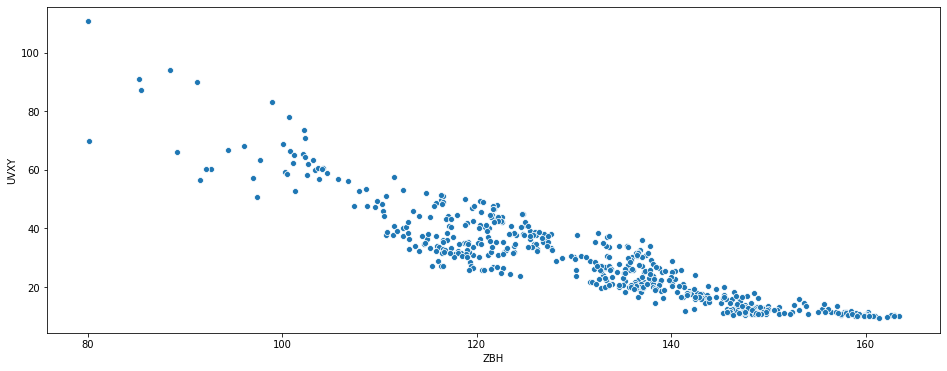

In [126]:
plt.figure(figsize=(16,6))
sns.scatterplot(data["ZBH"], data["UVXY"])

## Now that we have the data cleaned
- Lets see if the prices of 2000 stocks can predict the value of UVXY 
- We will use a Linear regression model first and will build a Deep learning model there after 

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [131]:
X = data.drop("UVXY", axis=1)
y = data["UVXY"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [134]:
X_train.shape

(427, 2233)

In [135]:
X_test.shape

(107, 2233)

## Scaling the data 

In [136]:
scalar = MinMaxScaler()

In [137]:
X_train = scalar.fit_transform(X_train)

In [138]:
X_test = scalar.transform(X_test)

## Creating Model

In [140]:
model = LinearRegression()

In [141]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
model.intercept_

87.4229692158056

In [149]:
pd.DataFrame(model.coef_, columns=["coeff"], index= X.columns).sort_values("coeff")

,coeff
FFG,-3.088609
ALBO,-2.447757
IRMD,-2.335016
NAV,-2.169914
HLI,-2.086882
...,...
LJPC,1.845504
GCBC,1.926174
WNEB,2.334294
EVFM,2.478855


In [150]:
predictions = model.predict(X_test)

## Putting predictions against true values

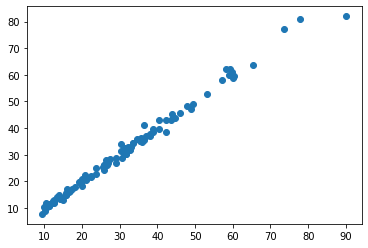

In [151]:
plt.scatter(y_test, predictions)

### Cecking random predicitons
- will use the model to try to predict the price of  UVXY 

In [234]:
from random import randint
random_index = randint(0 , len(data))
random_day = data.drop("UVXY", axis=1).iloc[random_index]

In [235]:
X_train.shape

(427, 2233)

In [236]:
random_day = scalar.transform(random_day.values.reshape(1,2233))

In [237]:
model.predict(random_day)

array([37.72000122])

## Lets check the true Value 
- We will check the true value in the data

In [238]:
data.iloc[random_index]["UVXY"]

37.72000122070313

In [239]:
import joblib

### Saving model

In [240]:
#joblib.dump(model, "uvxy_predictor.pk1", compress=9)

In [241]:
uv_model = joblib.load("uvxy_predictor.pk1")

In [242]:
uv_model.predict(random_day)

array([37.72000122])

## Daily Returns
- Lets get the daily returns for the data 

In [244]:
daily_returns = data.pct_change().dropna()

In [247]:
daily_returns

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,ZAGG,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZUO,ZYNE,ZYXI,UVXY
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032948,-0.034142,-0.035509,-0.032804,-0.039498,0.031218,-0.094530,...,-0.055664,0.005232,0.000000,-0.027149,0.008562,-0.013252,-0.028571,-0.013441,-0.024222,0.069045
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.071355,0.070267,0.078113,0.041860,0.011885,0.025310,0.049208,0.089918,0.046099,-0.117167
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003474,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.037645,0.037082,0.051058,0.013393,0.010067,0.047355,0.050674,0.000000,0.003390,-0.035219
2019-01-08,0.004191,0.024493,-0.012006,0.004647,0.025290,0.030309,0.017988,0.014918,-0.006950,0.008751,...,0.000930,0.008792,0.026602,-0.035242,0.053156,0.014430,0.012827,0.030000,-0.006757,-0.030303
2019-01-09,0.003235,0.013910,0.016691,-0.032823,0.005029,0.017210,-0.028206,0.011819,0.027559,-0.026988,...,0.072491,0.019756,-0.001803,0.031963,-0.022082,0.008535,0.007092,0.036408,0.020408,-0.033140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,0.009776,0.023000,0.003789,-0.017383,0.014869,-0.004133,0.031134,0.003333,0.007375,0.040614,...,0.014218,-0.010289,0.057509,0.066667,0.019447,0.036309,0.023676,0.129921,0.052105,-0.006965
2021-02-09,0.000996,-0.000978,0.005221,-0.013478,0.001438,0.015219,-0.007608,0.004638,0.014075,-0.006122,...,-0.014019,0.003899,0.007191,-0.003571,0.013052,-0.016684,0.008521,0.037456,0.000000,0.003006
2021-02-10,0.000774,-0.001631,0.001119,-0.012808,-0.002872,0.000292,-0.010976,-0.006814,0.007407,0.015840,...,-0.002370,-0.027184,0.017849,-0.012545,-0.008920,-0.007847,-0.017501,0.471033,-0.024012,0.023976


In [254]:
len(data)

534

In [255]:
len(daily_returns)

533

### Lets see if we can generate a model to predict the daily returns for UVXY
- we will need to drop NA values as well as even out the dfs

In [259]:
dd = data.drop("2019-01-02")

In [260]:
X = dd.drop("UVXY", axis=1)
y = daily_returns["UVXY"]

In [261]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [262]:
X_train = scalar.fit_transform(X_train)

In [263]:
X_test = scalar.transform(X_test)

In [264]:
mode = LinearRegression()

In [265]:
mode.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [266]:
mode.intercept_

0.6124086283181216

In [275]:
pd.DataFrame(mode.coef_, columns=["coeff"], index=X.columns).sort_values("coeff", ascending = False)

,coeff
OSMT,0.119849
ANGO,0.117118
LEVL,0.116399
BRID,0.112031
INOV,0.109194
...,...
PWOD,-0.106415
ANDE,-0.109026
RIGL,-0.122150
RGCO,-0.140726


## There is a very low coorelation 
- THe Prices of all the stocks has very low predictibility to the dily return of UVXY

In [276]:
predictions = mode.predict(X_test)

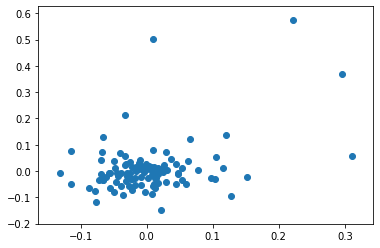

In [277]:
plt.scatter(predictions, y_test)

## Optimization 
- WE will optimize the penny stocks we collected earlier for this portfolio

In [281]:
penny_stocks = pd.read_csv("resources/1_15_2021_pennyDf_200companies.csv", index_col="Unnamed: 0")

In [290]:
penny_stocks = data[penny_stocks.drop(['SCG', 'CYCN', 'YGYI', 'SONM'], axis=1).columns]

In [292]:
penny_stocks_returns = penny_stocks.pct_change()

### Checing volatility for each penny stock
- Appears that that there are a few highly volitile companies in the penny list
- Lets take a look at these below
- WE will sort the vol values 

In [293]:
penny_vol = []
for x in penny_stocks_returns.columns:
    penny_vol.append(penny_stocks_returns[f"{x}"].std() * 252)

In [298]:
vol_df = pd.DataFrame(penny_vol, columns=["vol"], index=penny_stocks_returns.columns)

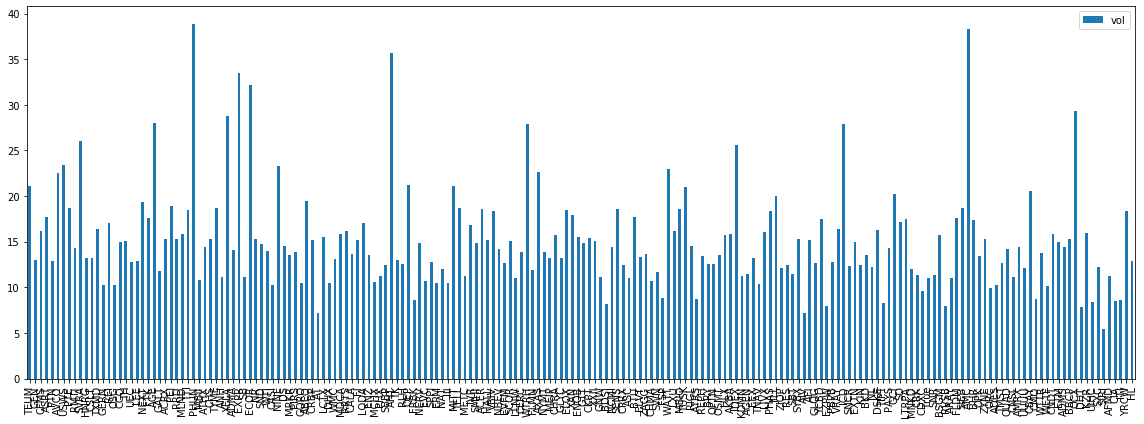

In [304]:
vol_df.plot(figsize = (16,6), kind = "bar")
plt.tight_layout()

In [312]:
vol_df.sort_values("vol", ascending=False).head(50)

,vol
PHUN,38.838279
AMC,38.348290
AHT,35.675467
EXPR,33.492049
ECOR,32.119352
OCX,29.348249
XELA,28.717814
AGE,27.964451
ICD,27.910214
WTRH,27.894564


In [396]:
len(penny_stocks.columns)

196

### Lets optimize a portfolio
- We will us all the penny stocks and nrrow it down to the top 10 by weight based on highest returns

In [315]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(penny_stocks.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(penny_stocks.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(penny_stocks_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(penny_stocks_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### Evaluating the portfolio
- Max sharp
- Max returns
- min vol
- again we are fetching the max return(focus) for a portfolio containing 10 companies in 2020

In [316]:
max_sharp = all_Sharps.argmax()

In [317]:
max_return = all_returns.argmax()

In [318]:
low_vol = all_vol.argmin()

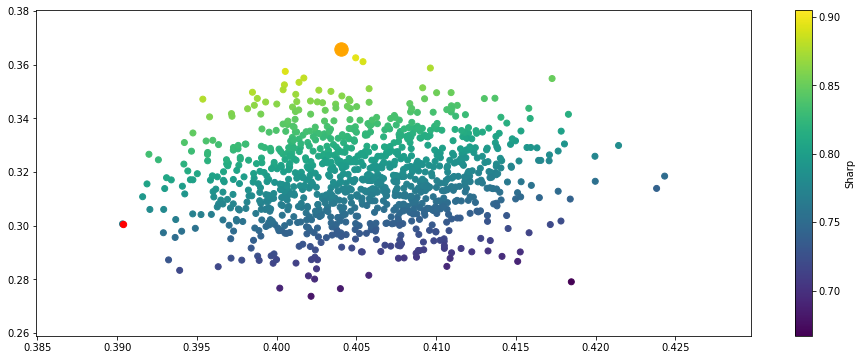

In [322]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 80)
plt.scatter(all_vol[low_vol], all_returns[low_vol], c="red", s = 40)
plt.scatter(all_vol[max_return], all_returns[max_return], c="orange", s = 180)

## Setting up Frontier Data 
- We will combine all the data into a frame to find the portfolio we need

In [325]:
weights_frame = pd.DataFrame(all_weights, columns=penny_stocks.columns)

In [336]:
returns_frame = pd.DataFrame(all_returns, columns=["returns"])

In [332]:
sharp_frame = pd.DataFrame(all_Sharps, columns=["Sharp"])

In [334]:
vol_frame = pd.DataFrame(all_vol, columns=["Vol"])

In [337]:
frontier_df = pd.concat([returns_frame,sharp_frame,vol_frame,weights_frame], axis=1)

### Below is the highest sharp portfolio
- Also the highest returning portfolio and appears to be the highest vol portfolio
- We will take the top 10 companies in this portfolio by weight and convert them into a portfolio of their own

In [341]:
frontier_df[frontier_df["returns"] == frontier_df["returns"].max()]

,returns,Sharp,Vol,TEUM,GEN,CFMS,ASRT,PTN,AVCO,USWS,...,DHT,KZR,UIHC,SXC,SIRI,AFMD,CIA,ITI,YRCW,HL
787,0.365745,0.905253,0.404025,0.00753,0.002389,0.007358,0.003932,0.009326,0.008086,0.006454,...,0.000186,0.001025,0.004724,0.006977,0.006608,0.000002,0.002709,0.002557,0.005608,0.005881


In [352]:
top_10_weighted = frontier_df[frontier_df["returns"] == frontier_df["returns"].max()].drop(["returns"
                                ,"Sharp","Vol"], axis = 1).transpose().sort_values(787, ascending = False).head(10)

In [354]:
top_10_weighted_tickers = top_10_weighted.index

In [358]:
top_10_df = penny_stocks[top_10_weighted_tickers]

In [362]:
top_10_df

,LCTX,CALA,NERV,HLX,VBIV,CDXC,ECOR,JILL,WTTR,CHRA
Date,,,,,,,,,,
2019-01-02,1.04,4.23,6.92,5.71,1.65,3.41,7.11,20.953659,6.80,8.10
2019-01-03,0.96,4.15,6.64,5.70,1.62,3.23,7.60,20.307688,6.98,7.66
2019-01-04,1.02,4.38,6.81,6.14,1.63,3.39,8.36,21.034403,7.08,8.07
2019-01-07,1.08,4.43,7.01,6.54,1.68,3.41,7.28,21.962986,7.17,8.17
2019-01-08,1.15,4.51,7.47,6.66,1.58,3.49,5.89,21.599628,7.31,7.92
...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2.83,3.29,3.53,4.79,4.30,5.75,2.72,4.550000,6.31,3.67
2021-02-09,2.92,3.22,3.49,4.73,4.32,6.27,2.83,4.530000,5.99,3.69
2021-02-10,2.89,3.20,3.35,4.81,4.14,6.09,2.91,5.460000,5.99,3.85


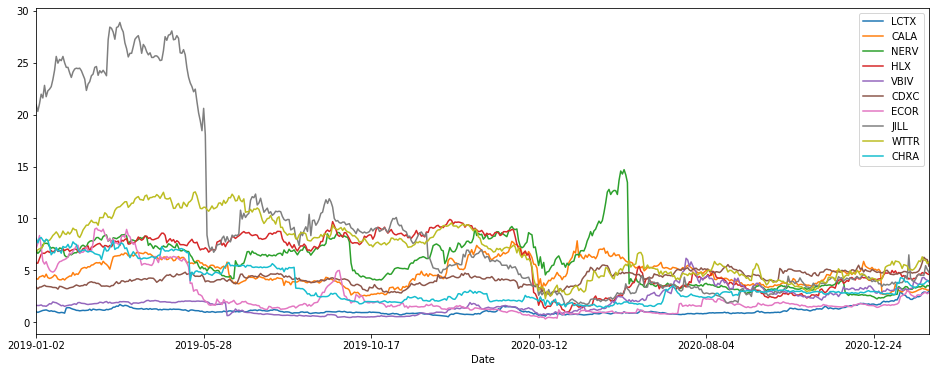

In [361]:
top_10_df.plot(figsize = (16,6))

## Returns for top 10

In [364]:
top_10_returns = penny_stocks_returns[top_10_weighted_tickers]

In [365]:
n_portfolios = 2000
all_weights = np.zeros((n_portfolios, len(top_10_df.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(top_10_df.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(top_10_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_10_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

## Getting the max sharp and the max returns and max vol

In [366]:
max_shp = all_Sharps.argmax()

In [367]:
max_sharp

787

In [368]:
max_re = all_returns.argmax()

In [369]:
max_re

1517

In [370]:
low_vol = all_vol.argmin()

In [371]:
low_vol

719

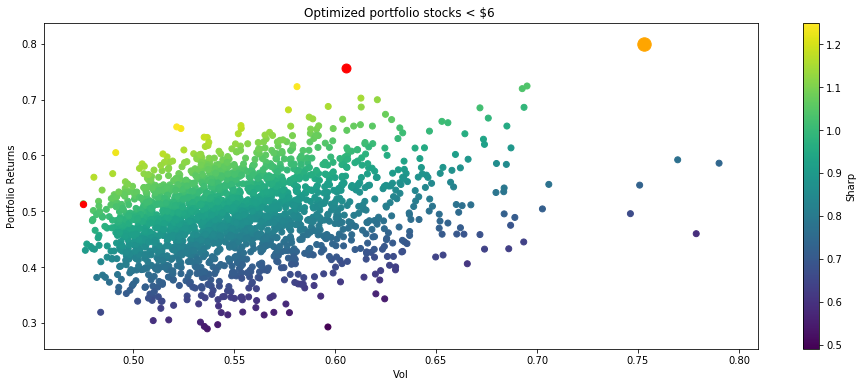

In [395]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_shp], all_returns[max_shp], c="red", s = 80)
plt.scatter(all_vol[low_vol], all_returns[low_vol], c="red", s = 40)
plt.scatter(all_vol[max_re], all_returns[max_re], c="orange", s = 180)
plt.ylabel("Portfolio Returns")
plt.xlabel("Vol")
plt.title("Optimized portfolio stocks < $6 ")
plt.savefig("resources/penny_frontier.png", dpi = 300)

### Penny Frontier

In [379]:
penny_weights = pd.DataFrame(all_weights, columns=top_10_df.columns)

In [382]:
sharp_df = pd.DataFrame(all_Sharps, columns=["sharp"])

In [385]:
penny_vol = pd.DataFrame(all_vol, columns=["vol"])

In [386]:
penny_returns = pd.DataFrame(all_returns, columns = ["returns"])

In [387]:
penny_frontier = pd.concat([penny_returns, penny_vol, sharp_df, penny_weights], axis=1)

In [393]:
penny_frontier.sort_values("returns", ascending=False)

,returns,vol,sharp,LCTX,CALA,NERV,HLX,VBIV,CDXC,ECOR,JILL,WTTR,CHRA
1517,0.799389,0.753133,1.061418,0.038385,0.087930,0.025500,0.089923,0.363321,0.015370,0.254110,0.029711,0.079943,0.015808
1949,0.756908,0.605444,1.250171,0.250612,0.074760,0.052013,0.093788,0.221586,0.078903,0.153018,0.022550,0.045240,0.007531
1694,0.724360,0.695092,1.042108,0.169239,0.014613,0.024582,0.072230,0.171616,0.075684,0.252401,0.008027,0.144724,0.066886
1333,0.723168,0.581184,1.244302,0.253569,0.071265,0.021444,0.075764,0.208716,0.062211,0.129249,0.022389,0.096332,0.059060
162,0.719615,0.692719,1.038827,0.115233,0.129823,0.080801,0.044595,0.207720,0.101986,0.254012,0.010893,0.040527,0.014407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.301078,0.533372,0.564480,0.014379,0.114477,0.143848,0.176333,0.010891,0.196789,0.008022,0.197731,0.067471,0.070060
1863,0.296545,0.541925,0.547206,0.078373,0.198312,0.207625,0.012399,0.016743,0.075436,0.002219,0.193333,0.051733,0.163827
979,0.293388,0.535302,0.548081,0.011223,0.123323,0.118942,0.041341,0.032217,0.107282,0.025756,0.201903,0.172400,0.165615
419,0.292394,0.596498,0.490184,0.011112,0.077165,0.089447,0.202341,0.020713,0.005720,0.015128,0.157926,0.235522,0.184925
